# Supplementary information to the team activity (unit6 z-scores and probability of events)

In the team activity were given the following example statistical information for two stations with daily temperatures (F):
| stat | Whynot Village| Town Fries|
|------|---------------|-----------|
| mean | 89.5 | 3.0|
| std  | 88.0 | 4.0|
###### (Check out these 'weird'  [town names](https://www.babbel.com/en/magazine/the-35-weirdest-city-and-town-names-in-the-usa))

Threshold to call it a extreme event:

__T>100F__



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm , t

## Generating normally distributed sample data

norm.rvs() has keyword parameters
- location parameter (center of the distribution, population mean)
- scale parameter (width of the distribution, population standard deviation)


```
    loc : array_like, optional
        Location parameter (default=0).
    scale : array_like, optional
        Scale parameter (default=1).
    size : int or tuple of ints, optional
        Defining number of random variates (default is 1).
```





In [3]:
# get the supporting package time for sleep function
from time import sleep
whynot={'location':'Whynot Village','mean':89.5,'std':3.0}
fries={'location':'Town Fries', 'mean':88.0,'std':4.0}

wait=1 # seconds
nsample=1000
data=np.zeros(shape=(nsample,2))

print ("simulate a random sequence of daily mean (summer) temperatures for two towns ...")
print(80*"-")
extremes=np.zeros(2) # counter for the extreme events

threshold=float(input("Enter your temperature threshold for extreme hot days (e.g. 95.0)"))

    
n=0
while n<nsample:
    temp1=norm.rvs(loc=whynot['mean'],scale=whynot['std'],size=1)
    temp2=norm.rvs(loc=fries['mean'],scale=fries['std'],size=1)  
    if (temp1>threshold):    
        extremes[0]=extremes[0]+1
        label1="(Hot Whynot!)"
    else:
        label1="             "        
    if (temp2>threshold):    
        extremes[1]=extremes[1]+1
        label2="(Hot Fries!) "
    else:
        label2="             "
    line=f"{n:3d}, Whynot temp: {temp1[0]:.2f} {label1}, Fries temp: {temp2[0]:.2f} {label2}"
    # save sample data
    data[n,0]=temp1
    data[n,1]=temp2
    print (line)
    n+=1
    #sleep(wait)


simulate a random sequence of daily mean (summer) temperatures for two towns ...
--------------------------------------------------------------------------------


Enter your temperature threshold for extreme hot days (e.g. 95.0) 100


  0, Whynot temp: 92.22              , Fries temp: 89.81              
  1, Whynot temp: 91.66              , Fries temp: 90.43              
  2, Whynot temp: 91.08              , Fries temp: 85.64              
  3, Whynot temp: 91.18              , Fries temp: 92.53              
  4, Whynot temp: 89.22              , Fries temp: 92.53              
  5, Whynot temp: 90.97              , Fries temp: 84.81              
  6, Whynot temp: 89.53              , Fries temp: 91.38              
  7, Whynot temp: 92.23              , Fries temp: 95.42              
  8, Whynot temp: 84.66              , Fries temp: 91.29              
  9, Whynot temp: 92.88              , Fries temp: 83.88              
 10, Whynot temp: 97.82              , Fries temp: 85.51              
 11, Whynot temp: 87.01              , Fries temp: 88.02              
 12, Whynot temp: 89.94              , Fries temp: 91.38              
 13, Whynot temp: 89.79              , Fries temp: 82.84              
 14, W

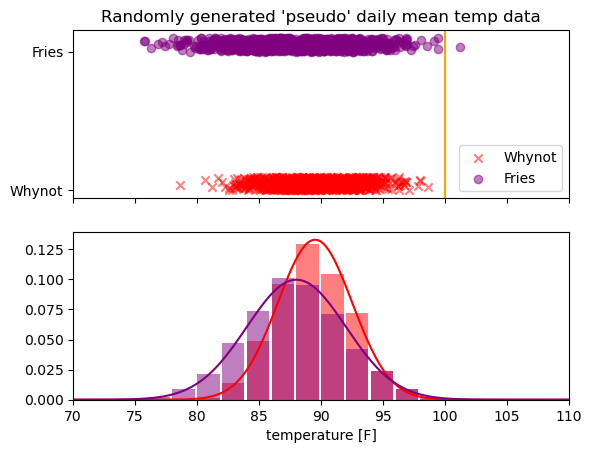

In [4]:
fig,ax=plt.subplots(2,1,sharex=True)
yrand=np.random.uniform(size=nsample)
ax[0].scatter(data[:,0],10+yrand,marker='x',color='red',label='Whynot',alpha=0.5)
ax[0].scatter(data[:,1],20+yrand,marker='o',color='purple',label='Fries',alpha=0.5)
ax[0].legend()
ax[0].set_xlim(70,110)
ax[0].set_title("Randomly generated 'pseudo' daily mean temp data")
ax[1].hist(data[:,0],bins=np.arange(70,110,2),
           width=1.8,color='red',alpha=0.5,density=True)
ax[1].hist(data[:,1],bins=np.arange(70,110,2),
           width=1.8,color='purple',alpha=0.5,density=True)
ax[1].set_xlabel("temperature [F]")
ax[0].axvline(threshold,0,20,color='orange')
ax[0].set_yticks([10,20],['Whynot','Fries'])
fig.show()


# add normal distribution PDF
temp_range=np.arange(70,110,0.1)
pdf1=norm.pdf(temp_range,loc=whynot['mean'],scale=whynot['std'])

ax[1].plot(temp_range,pdf1,color='red')
pdf2=norm.pdf(temp_range,loc=fries['mean'],scale=fries['std'])

ax[1].plot(temp_range,pdf2,color='purple')
fig.show()

#### Z-score value of the threshold for Whynot and Fries climate

In [5]:

z1=(threshold-whynot['mean'])/whynot['std']
z2=(threshold-fries['mean'])/fries['std']

print(f"Whynot Village's z-score of the threshold value {threshold}: z={z1:.5f}")
print(f"Town Fries's     z-score of the threshold value {threshold}: z={z2:.5f}")


Whynot Village's z-score of the threshold value 100.0: z=3.50000
Town Fries's     z-score of the threshold value 100.0: z=3.00000


In [7]:
#### Look-up value of the Probability exceeding 100F
p1=1-norm.cdf(z1)
p2=1-norm.cdf(z2)
print(f"Whynot Village exceedance prob:  P(temp>{threshold:.2f}) = {p1:.5f}")
print(f"Town Fries     exceedance prob:  P(temp>{threshold:.2f}) = {p2:.5f}")

Whynot Village exceedance prob:  P(temp>100.00) = 0.00023
Town Fries     exceedance prob:  P(temp>100.00) = 0.00135


In [8]:
#### Look-up value of the Probability exceeding 100F
# smae with the direct value p1=norm.cdf(threshold,loc= ... )
p1=1-norm.cdf(threshold,loc=whynot['mean'],scale=whynot['std'])
p2=1-norm.cdf(threshold,loc=fries['mean'],scale=fries['std'])
print(f"Whynot Village exceedance prob:  P(temp>{threshold:.2f}) = {p1:.5f}")
print(f"Town Fries     exceedance prob:  P(temp>{threshold:.2f}) = {p2:.5f}")

Whynot Village exceedance prob:  P(temp>100.00) = 0.00023
Town Fries     exceedance prob:  P(temp>100.00) = 0.00135


In [9]:
## With climate change affecting a shift of the dsitribution
delta=2.0 #F climate change (mean) 
p1new=1-norm.cdf(threshold,loc=(whynot['mean']+delta),scale=whynot['std'])
p2new=1-norm.cdf(threshold,loc=(fries['mean']+delta),scale=fries['std'])
print(f"Whynot Village exceedance prob:  P(temp>{threshold:.2f}) = {p1new:.5f}")
print(f"Town Fries     exceedance prob:  P(temp>{threshold:.2f}) = {p2new:.5f}")
print(80*"=")
print("ratios: new/old probability:")
print(80*"=")
print (f"Whynot Village: ratio {p1new:.5f}/{p1:.5f} = {(p1new/p1):.5f}")
print (f"Town Fries    : ratio {p2new:.5f}/{p2:.5f} = {(p2new/p2):.5f}")
       

Whynot Village exceedance prob:  P(temp>100.00) = 0.00230
Town Fries     exceedance prob:  P(temp>100.00) = 0.00621
ratios: new/old probability:
Whynot Village: ratio 0.00230/0.00023 = 9.90102
Town Fries    : ratio 0.00621/0.00135 = 4.60010


In [10]:
#### Look-up value of the Probability exceeding 100F
# smae with the direct value p1=norm.cdf(threshold,loc= ... )
p1=norm.cdf(threshold,loc=whynot['mean'],scale=whynot['std'])
p2=norm.cdf(threshold,loc=fries['mean'],scale=fries['std'])
print(f"Whynot Village exceedance prob:  P(temp>{threshold:.2f}) = {1-p1:.5f}")
print(f"Town Fries     exceedance prob:  P(temp>{threshold:.2f}) = {1-p2:.5f}")

Whynot Village exceedance prob:  P(temp>100.00) = 0.00023
Town Fries     exceedance prob:  P(temp>100.00) = 0.00135


## Simulate with climate warming shift in the mean




In [11]:
n=0
while n<nsample:
    temp1=norm.rvs(loc=whynot['mean']+delta,scale=whynot['std'],size=1)
    temp2=norm.rvs(loc=fries['mean']+delta,scale=fries['std'],size=1)  
    if (temp1>threshold):    
        extremes[0]=extremes[0]+1
        label1="(Hot Whynot!)"
    else:
        label1="             "        
    if (temp2>threshold):    
        extremes[1]=extremes[1]+1
        label2="(Hot Fries!) "
    else:
        label2="             "
    line=f"{n:3d}, Whynot temp: {temp1[0]:.2f} {label1}, Fries temp: {temp2[0]:.2f} {label2}"
    # save sample data
    data[n,0]=temp1
    data[n,1]=temp2
    print (line)
    n+=1
    #sleep(wait)

  0, Whynot temp: 89.87              , Fries temp: 91.96              
  1, Whynot temp: 90.71              , Fries temp: 90.45              
  2, Whynot temp: 92.55              , Fries temp: 90.01              
  3, Whynot temp: 96.19              , Fries temp: 90.76              
  4, Whynot temp: 91.95              , Fries temp: 82.01              
  5, Whynot temp: 94.88              , Fries temp: 90.92              
  6, Whynot temp: 87.14              , Fries temp: 84.80              
  7, Whynot temp: 92.10              , Fries temp: 91.98              
  8, Whynot temp: 88.17              , Fries temp: 88.01              
  9, Whynot temp: 89.22              , Fries temp: 91.18              
 10, Whynot temp: 92.91              , Fries temp: 87.73              
 11, Whynot temp: 99.16              , Fries temp: 86.44              
 12, Whynot temp: 86.75              , Fries temp: 83.04              
 13, Whynot temp: 88.97              , Fries temp: 86.63              
 14, W

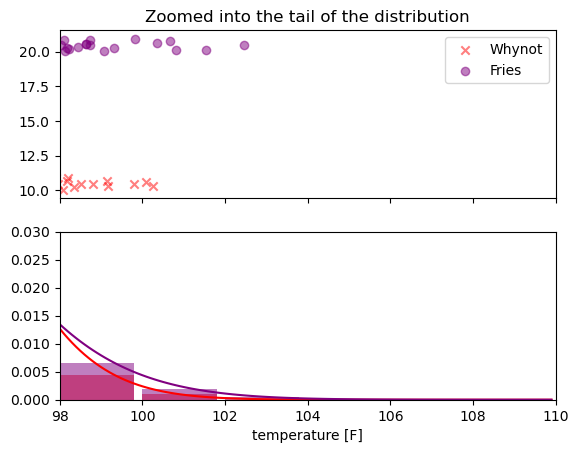

In [12]:
fig,ax=plt.subplots(2,1,sharex=True)
yrand=np.random.uniform(size=nsample)
ax[0].scatter(data[:,0],10+yrand,marker='x',color='red',label='Whynot',alpha=0.5)
ax[0].scatter(data[:,1],20+yrand,marker='o',color='purple',label='Fries',alpha=0.5)
ax[0].legend()
ax[0].set_xlim(98,110)
ax[0].set_title("Zoomed into the tail of the distribution")
ax[1].hist(data[:,0],bins=np.arange(70,110,2),
           width=1.8,color='red',alpha=0.5,density=True)
ax[1].hist(data[:,1],bins=np.arange(70,110,2),
           width=1.8,color='purple',alpha=0.5,density=True)
ax[1].set_xlabel("temperature [F]")

fig.show()


# add normal distribution PDF
temp_range=np.arange(98,110,0.1)
pdf1=norm.pdf(temp_range,loc=whynot['mean']+delta,scale=whynot['std'])

ax[1].plot(temp_range,pdf1,color='red')
pdf2=norm.pdf(temp_range,loc=fries['mean']+delta,scale=fries['std'])

ax[1].plot(temp_range,pdf2,color='purple')
ax[1].set_ylim(0,0.03)
fig.show()